In [14]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch_geometric.nn import GCNConv
from torch_geometric.datasets import Planetoid
from torch_geometric.datasets import KarateClub

import networkx as nx
import matplotlib.pyplot as plt

Planetoid Cora dataset

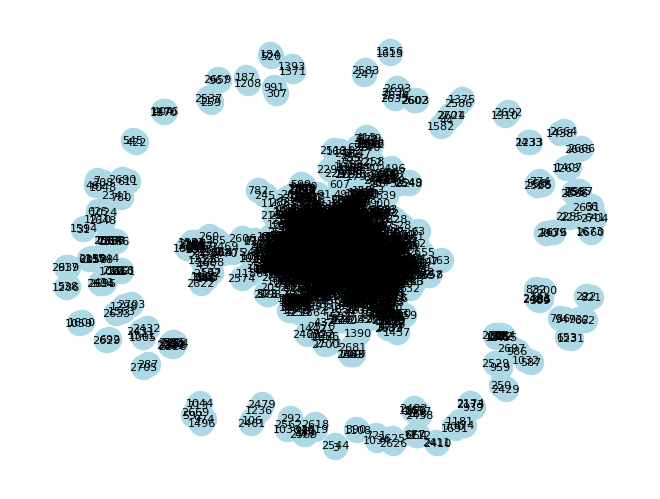

Epoch: 1, Accuracy: 0.3312
Epoch: 2, Accuracy: 0.3914
Epoch: 3, Accuracy: 0.4549
Epoch: 4, Accuracy: 0.5406
Epoch: 5, Accuracy: 0.6289
Epoch: 6, Accuracy: 0.6939
Epoch: 7, Accuracy: 0.7400
Epoch: 8, Accuracy: 0.7592
Epoch: 9, Accuracy: 0.7718
Epoch: 10, Accuracy: 0.7792
Epoch: 11, Accuracy: 0.7884
Epoch: 12, Accuracy: 0.7969
Epoch: 13, Accuracy: 0.8010
Epoch: 14, Accuracy: 0.8035
Epoch: 15, Accuracy: 0.8050
Epoch: 16, Accuracy: 0.8035
Epoch: 17, Accuracy: 0.8035
Epoch: 18, Accuracy: 0.8047
Epoch: 19, Accuracy: 0.8054
Epoch: 20, Accuracy: 0.8080
Epoch: 21, Accuracy: 0.8087
Epoch: 22, Accuracy: 0.8087
Epoch: 23, Accuracy: 0.8076
Epoch: 24, Accuracy: 0.8080
Epoch: 25, Accuracy: 0.8080
Epoch: 26, Accuracy: 0.8083
Epoch: 27, Accuracy: 0.8076
Epoch: 28, Accuracy: 0.8065
Epoch: 29, Accuracy: 0.8072
Epoch: 30, Accuracy: 0.8072
Epoch: 31, Accuracy: 0.8072
Epoch: 32, Accuracy: 0.8069
Epoch: 33, Accuracy: 0.8069
Epoch: 34, Accuracy: 0.8061
Epoch: 35, Accuracy: 0.8061
Epoch: 36, Accuracy: 0.8069
E

In [15]:
# Define the Graph Convolutional Network model
class GCN(nn.Module):
    def __init__(self, num_features, hidden_dim, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Load the dataset
dataset = Planetoid(root='/tmp/Cora', name='Cora')

# Split the dataset into training set
data = dataset[0]
x, edge_index, y = data.x, data.edge_index, data.y
train_mask = data.train_mask

# Create the model and define the optimizer
model = GCN(dataset.num_features, hidden_dim=16, num_classes=dataset.num_classes)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Create the loss function
criterion = nn.CrossEntropyLoss()

# Convert edge_index to edge list format
edges = edge_index.t().tolist()

# Create a networkx graph object
G = nx.Graph(edges)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=300, font_size=8)

# Show the graph
plt.show()

# Training loop
def train():
    model.train()
    optimizer.zero_grad()
    output = model(x, edge_index)
    loss = criterion(output[train_mask], y[train_mask])
    loss.backward()
    optimizer.step()

# Evaluation function
def evaluate():
    model.eval()
    output = model(x, edge_index)
    pred = output.argmax(dim=1)
    acc = pred.eq(y).sum().item() / y.size(0)
    return acc

# Train and evaluate the model
accuracies = []
for epoch in range(200):
    train()
    acc = evaluate()
    accuracies.append(acc)
    print(f'Epoch: {epoch+1}, Accuracy: {acc:.4f}')

# Calculate average accuracy
avg_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Accuracy: {avg_accuracy:.4f}')

Planetoid CiteSeer dataset

Processing...
Done!


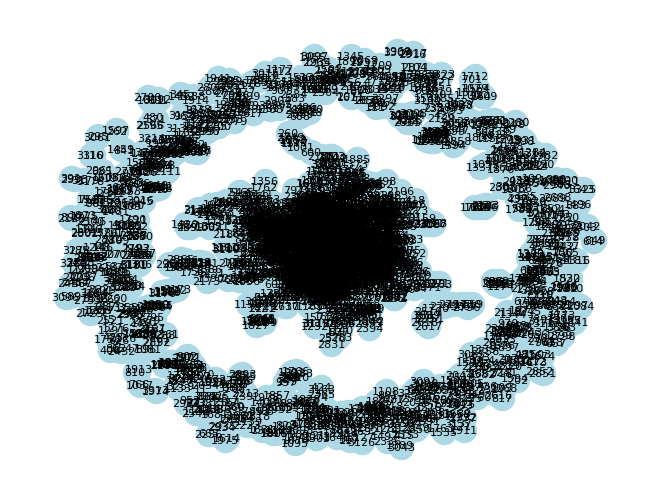

Epoch: 1, Accuracy: 0.5509
Epoch: 2, Accuracy: 0.5957
Epoch: 3, Accuracy: 0.5942
Epoch: 4, Accuracy: 0.6011
Epoch: 5, Accuracy: 0.6041
Epoch: 6, Accuracy: 0.6047
Epoch: 7, Accuracy: 0.6171
Epoch: 8, Accuracy: 0.6279
Epoch: 9, Accuracy: 0.6360
Epoch: 10, Accuracy: 0.6426
Epoch: 11, Accuracy: 0.6471
Epoch: 12, Accuracy: 0.6507
Epoch: 13, Accuracy: 0.6510
Epoch: 14, Accuracy: 0.6498
Epoch: 15, Accuracy: 0.6492
Epoch: 16, Accuracy: 0.6492
Epoch: 17, Accuracy: 0.6492
Epoch: 18, Accuracy: 0.6492
Epoch: 19, Accuracy: 0.6507
Epoch: 20, Accuracy: 0.6498
Epoch: 21, Accuracy: 0.6513
Epoch: 22, Accuracy: 0.6525
Epoch: 23, Accuracy: 0.6537
Epoch: 24, Accuracy: 0.6570
Epoch: 25, Accuracy: 0.6570
Epoch: 26, Accuracy: 0.6576
Epoch: 27, Accuracy: 0.6580
Epoch: 28, Accuracy: 0.6598
Epoch: 29, Accuracy: 0.6619
Epoch: 30, Accuracy: 0.6610
Epoch: 31, Accuracy: 0.6595
Epoch: 32, Accuracy: 0.6595
Epoch: 33, Accuracy: 0.6586
Epoch: 34, Accuracy: 0.6598
Epoch: 35, Accuracy: 0.6592
Epoch: 36, Accuracy: 0.6595
E

In [16]:
# Define the Graph Convolutional Network model
class GCN(nn.Module):
    def __init__(self, num_features, hidden_dim, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Load the dataset
dataset = Planetoid(root='/tmp/CiteSeer', name='CiteSeer')

# Split the dataset into training set
data = dataset[0]
x, edge_index, y = data.x, data.edge_index, data.y
train_mask = data.train_mask

# Create the model and define the optimizer
model = GCN(dataset.num_features, hidden_dim=16, num_classes=dataset.num_classes)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Create the loss function
criterion = nn.CrossEntropyLoss()

# Convert edge_index to edge list format
edges = edge_index.t().tolist()

# Create a networkx graph object
G = nx.Graph(edges)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=300, font_size=8)

# Show the graph
plt.show()

# Training loop
def train():
    model.train()
    optimizer.zero_grad()
    output = model(x, edge_index)
    loss = criterion(output[train_mask], y[train_mask])
    loss.backward()
    optimizer.step()

# Evaluation function
def evaluate():
    model.eval()
    output = model(x, edge_index)
    pred = output.argmax(dim=1)
    acc = pred.eq(y).sum().item() / y.size(0)
    return acc

# Train and evaluate the model
accuracies = []
for epoch in range(200):
    train()
    acc = evaluate()
    accuracies.append(acc)
    print(f'Epoch: {epoch+1}, Accuracy: {acc:.4f}')

# Calculate average accuracy
avg_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Accuracy: {avg_accuracy:.4f}')

Karate Club dataset

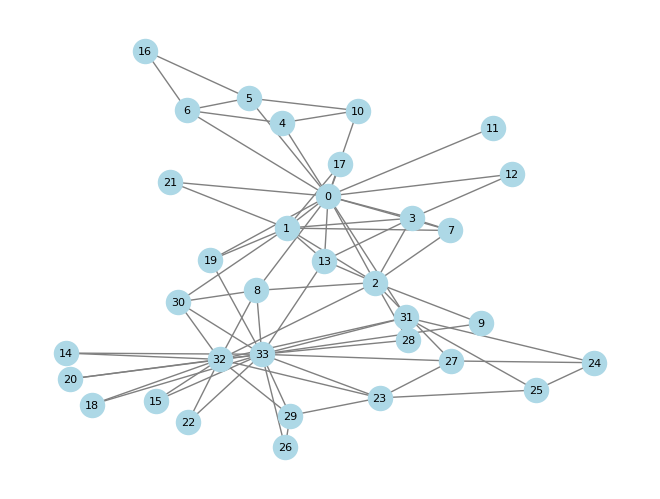

Epoch: 1, Accuracy: 0.5294
Epoch: 2, Accuracy: 0.5882
Epoch: 3, Accuracy: 0.6765
Epoch: 4, Accuracy: 0.7353
Epoch: 5, Accuracy: 0.7353
Epoch: 6, Accuracy: 0.7059
Epoch: 7, Accuracy: 0.7353
Epoch: 8, Accuracy: 0.7647
Epoch: 9, Accuracy: 0.7647
Epoch: 10, Accuracy: 0.7647
Epoch: 11, Accuracy: 0.7647
Epoch: 12, Accuracy: 0.7647
Epoch: 13, Accuracy: 0.7941
Epoch: 14, Accuracy: 0.7941
Epoch: 15, Accuracy: 0.7941
Epoch: 16, Accuracy: 0.7941
Epoch: 17, Accuracy: 0.7941
Epoch: 18, Accuracy: 0.7941
Epoch: 19, Accuracy: 0.7941
Epoch: 20, Accuracy: 0.7941
Epoch: 21, Accuracy: 0.7941
Epoch: 22, Accuracy: 0.8235
Epoch: 23, Accuracy: 0.8235
Epoch: 24, Accuracy: 0.8529
Epoch: 25, Accuracy: 0.9412
Epoch: 26, Accuracy: 0.9412
Epoch: 27, Accuracy: 0.9118
Epoch: 28, Accuracy: 0.9118
Epoch: 29, Accuracy: 0.9118
Epoch: 30, Accuracy: 0.8824
Epoch: 31, Accuracy: 0.8824
Epoch: 32, Accuracy: 0.8529
Epoch: 33, Accuracy: 0.8529
Epoch: 34, Accuracy: 0.8529
Epoch: 35, Accuracy: 0.8235
Epoch: 36, Accuracy: 0.8235
E

In [17]:
# Define the Graph Convolutional Network model
class GCN(nn.Module):
    def __init__(self, num_features, hidden_dim, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Load the dataset
dataset = KarateClub()

# Split the dataset into training set
data = dataset[0]
x, edge_index, y = data.x, data.edge_index, data.y
train_mask = data.train_mask

# Create the model and define the optimizer
model = GCN(dataset.num_features, hidden_dim=16, num_classes=dataset.num_classes)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Create the loss function
criterion = nn.CrossEntropyLoss()

# Convert edge_index to edge list format
edges = edge_index.t().tolist()

# Create a networkx graph object
G = nx.Graph(edges)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=300, font_size=8)

# Show the graph
plt.show()

# Training loop
def train():
    model.train()
    optimizer.zero_grad()
    output = model(x, edge_index)
    loss = criterion(output[train_mask], y[train_mask])
    loss.backward()
    optimizer.step()

# Evaluation function
def evaluate():
    model.eval()
    output = model(x, edge_index)
    pred = output.argmax(dim=1)
    acc = pred.eq(y).sum().item() / y.size(0)
    return acc

# Train and evaluate the model
accuracies = []
for epoch in range(200):
    train()
    acc = evaluate()
    accuracies.append(acc)
    print(f'Epoch: {epoch+1}, Accuracy: {acc:.4f}')

# Calculate average accuracy
avg_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Accuracy: {avg_accuracy:.4f}')